In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai.vision.all import *
import PIL
from utils import *

In [3]:
PATH.ls()

(#5) [Path('/home/slex/data/shopee/sample_submission.csv'),Path('/home/slex/data/shopee/train_images'),Path('/home/slex/data/shopee/train.csv'),Path('/home/slex/data/shopee/test_images'),Path('/home/slex/data/shopee/test.csv')]

In [4]:
train_imgs = (PATH/'train_images').ls()
train_imgs

(#32412) [Path('/home/slex/data/shopee/train_images/c3244cd21f1dc46353f25144c82b54f9.jpg'),Path('/home/slex/data/shopee/train_images/dbfe84fab02f59b9c43a13b32dc06d8a.jpg'),Path('/home/slex/data/shopee/train_images/10dfb9438566d88d2ee108aaff506dc2.jpg'),Path('/home/slex/data/shopee/train_images/fdf85b59a86f8162a900ed9a682097bb.jpg'),Path('/home/slex/data/shopee/train_images/90b5e31d5b7d386210dda6792cb610eb.jpg'),Path('/home/slex/data/shopee/train_images/890c3e427caa61d2098b14f09f5f8d25.jpg'),Path('/home/slex/data/shopee/train_images/df197e7ed48a93d369fec50fd4608b1b.jpg'),Path('/home/slex/data/shopee/train_images/67a996f933d79f95fe2f1d6f6341f4dc.jpg'),Path('/home/slex/data/shopee/train_images/88370d70df7dfe3da91e401a40cd772e.jpg'),Path('/home/slex/data/shopee/train_images/f3e63d9dbe71029a63aa9037524914f6.jpg')...]

In [5]:
data = pd.read_csv(PATH/'train.csv')
data

posting_id                                 image  \
0       train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg   
1      train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg   
2      train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg   
3      train_2406599165  00117e4fc239b1b641ff08340b429633.jpg   
4      train_3369186413  00136d1cf4edede0203f32f05f660588.jpg   
...                 ...                                   ...   
34245  train_4028265689  fff1c07ceefc2c970a7964cfb81981c5.jpg   
34246   train_769054909  fff401691371bdcb382a0d9075dfea6a.jpg   
34247   train_614977732  fff421b78fa7284284724baf249f522e.jpg   
34248  train_3630949769  fff51b87916dbfb6d0f8faa01bee67b8.jpg   
34249  train_1792180725  ffffa0ab2ae542357671e96254fa7167.jpg   

            image_phash  \
0      94974f937d4c2433   
1      af3f9460c2838f0f   
2      b94cb00ed3e50f78   
3      8514fc58eafea283   
4      a6f319f924ad708c   
...                 ...   
34245  e3cd72389f248f21   
34246  be86851f72e2853c   
34247  ad27f0d08c0fcbf0   
34248  e3b13bd1d896c05c   
34249  af8bc4b2d2cf9083   

                                                                                                    title  \
0                                                                               Paper Bag Victoria Secret   
1                                            Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DOUBLE FOAM TAPE   
2                                                             Maling TTS Canned Pork Luncheon Meat 397 gr   
3      Daster Batik Lengan pendek - Motif Acak / Campur - Leher Kancing (DPT001-00) Batik karakter Alhadi   
4                                                                       Nescafe \xc3\x89clair Latte 220ml   
...                                                                                                   ...   
34245                                 Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ply lapis Bisa Dicuci   
34246                                                     MamyPoko Pants Royal Soft - S 70 - Popok Celana   
34247                                     KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Metal Wired Headset   
34248            Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , Sapi Lokal,  Jamur (Bkn Alsultan / Biocell)   
34249                                                FLEX TAPE PELAPIS BOCOR / ISOLASI AJAIB / ANTI BOCOR   

       label_group  
0        249114794  
1       2937985045  
2       2395904891  
3       4093212188  
4       3648931069  
...            ...  
34245   3776555725  
34246   2736479533  
34247   4101248785  
34248   1663538013  
34249    459464107  

[34250 rows x 5 columns]

In [6]:
grouped = data.groupby('label_group').count().posting_id
grouped.describe()

count    11014.000000
mean         3.109679
std          2.940827
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         51.000000
Name: posting_id, dtype: float64

In [23]:
len(grouped[grouped==2]), len(grouped[grouped==3]), len(grouped[grouped>3]), len(grouped[grouped>50])

(6979, 1779, 2256, 7)

## Image resolutions

In [35]:
def get_img_height(fname):
    return PIL.Image.open(PATH/'train_images'/fname).shape[0]
def get_img_width(fname):
    return PIL.Image.open(PATH/'train_images'/fname).shape[1]

heights = [get_img_height(img) for img in data.image.to_list()[:10]]
heights

[1024, 1000, 640, 640, 756, 640, 640, 640, 300, 700]

In [36]:
data['height'] = [get_img_height(img) for img in data.image.to_list()]

In [39]:
data['width'] = [get_img_width(img) for img in data.image.to_list()]

In [38]:
data.height.describe()

count    34250.000000
mean       753.110745
std        189.319626
min        100.000000
25%        640.000000
50%        700.000000
75%        960.000000
max       5000.000000
Name: height, dtype: float64

In [40]:
data.width.describe()

count    34250.000000
mean       753.100175
std        189.337824
min        100.000000
25%        640.000000
50%        700.000000
75%        960.000000
max       5000.000000
Name: width, dtype: float64

In [42]:
print('Square')
len(data[data.width==data.height]) / len(data)

Square


0.9965547445255475

In [45]:
non_square = data[data.width != data.height]
non_square

posting_id                                 image  \
20      train_999391364  00324695e37299a00b955674d984592b.jpg   
495    train_4282832671  0404c41acf973bb9c4d19ef1dd569658.jpg   
618    train_1779298613  04f28e4d37ad224fe5815b1295e48217.jpg   
807    train_3363510497  0660e3b8689d1a5dda8ff429861bea86.jpg   
2596   train_2220249707  13d8490baf6dfc4d73ddb0deac201c6e.jpg   
...                 ...                                   ...   
33397  train_1399110808  f9cd20d9a882b746169c40f485c8a0fc.jpg   
33866  train_1651805423  fd26bc640601a3323f97c1878a49d0a6.jpg   
33908  train_1802885105  fd6a6fda0a7f939b070f5ac975cf7394.jpg   
34242  train_3445757395  ffec72f12011f37a8ade8fc5ec3a571c.jpg   
34243  train_3480437118  ffec72f12011f37a8ade8fc5ec3a571c.jpg   

            image_phash  \
20     a734d84d34702f37   
495    acde46c3f01e2798   
618    f96c8793849e9364   
807    b5e9aaf73301c071   
2596   e5dc9e8996674321   
...                 ...   
33397  bfc878d0e1c6c49a   
33866  b430c3cccbcbcb2c   
33908  9ecf01cc21cf1f0d   
34242  ab37362b173630aa   
34243  ab37362b173630aa   

                                                                                                                                   title  \
20                                                                                                Safi Dermasafe Night Moisturiser 50 gr   
495                                                                                                  Jamia - Pashmina Instan dengan tali   
618    \xe2\x9a\xa1\xef\xb8\x8f100% ORIGINAL [MAGIC KERATIN MASK] \xe2\x80\xa2 ONLY YOU \xe2\x80\xa2 MADE IN USA\xe2\x9a\xa1\xef\xb8\x8f   
807                                                                                                              Deenay DIARA DUSTY PINK   
2596                                                                           Dress Manohara Panjang Motif Floral (Pilih Warna & Motif)   
...                                                                                                                                  ...   
33397                                                                                                Gula Halus cap Segi Tiga Emas 250gr   
33866                                                                         Bebek Kamar Mandi Pembersih Kamar Mandi Fresh Pouch 400 ml   
33908                                                                                                  Samsung Galaxy M21 4/64 GB- Green   
34242                                                                            Johnson\xe2\x80\x99s Top to Toe Hair & Body Bath 500 ml   
34243                                                             Johnson\xe2\x80\x99s Top to Toe Hair & Body Bath 500 ml (Do not order)   

       label_group  height  width  
20      3624674138    4501   4500  
495     3024571735     640    530  
618     2310144463     638    640  
807     3857129338     639    640  
2596    3729011877     640    480  
...            ...     ...    ...  
33397   2835260521     640    480  
33866   3812162068     461    640  
33908   1086384343     640    639  
34242   3561125014    1001   1000  
34243   3561125014    1001   1000  

[118 rows x 7 columns]

## RANDOM SAMPLE

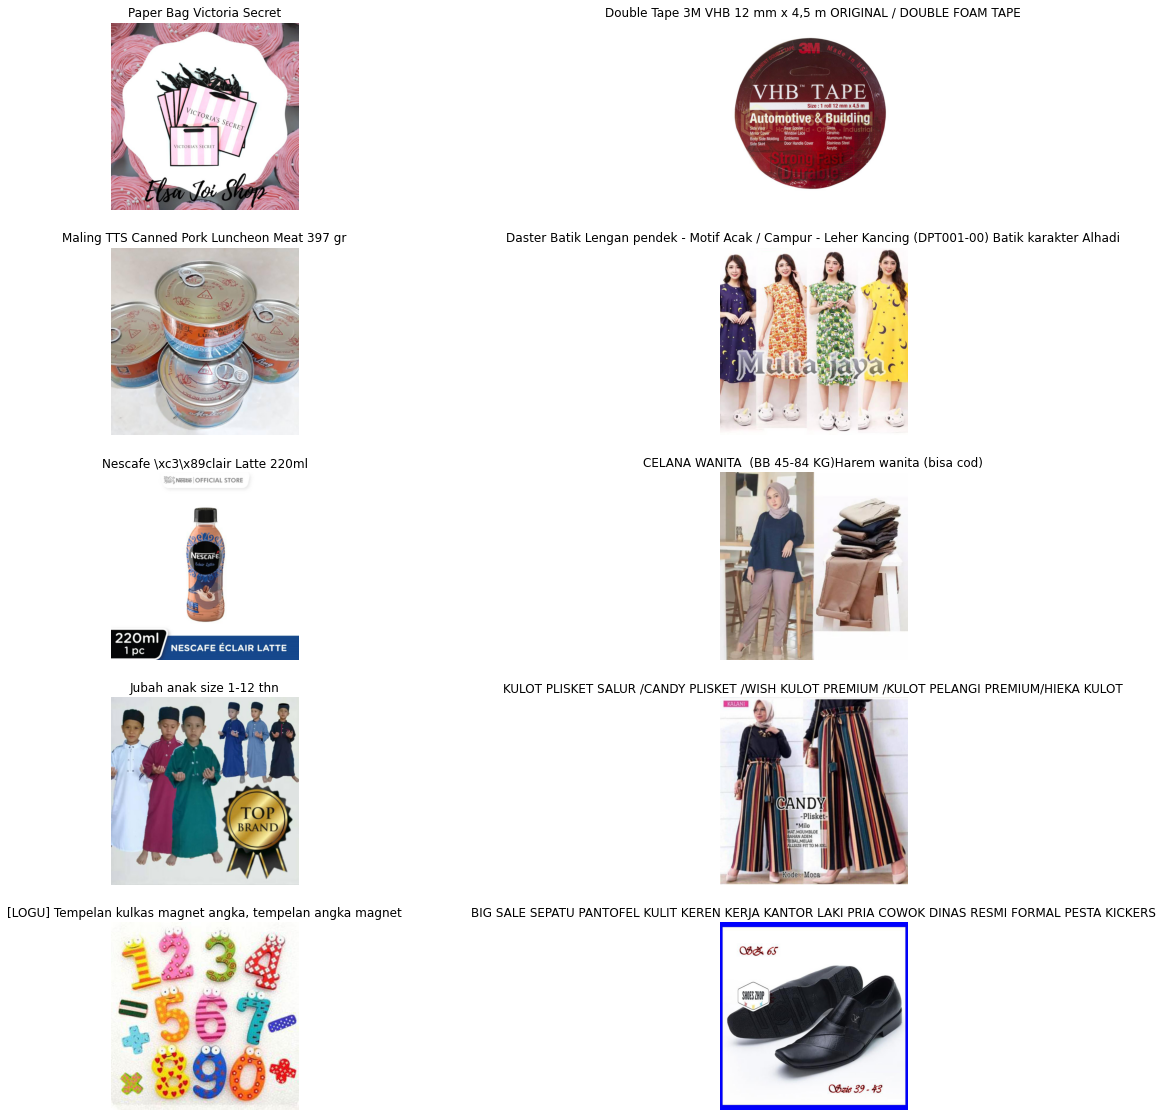

In [8]:
show(data[:10])

## MATCHING PAIRS

In [16]:
labels = grouped[grouped==2][:10]
labels.index.to_list()

[297977,
 801176,
 887886,
 942089,
 3108272,
 4063438,
 4262657,
 4340963,
 5029586,
 5488150]

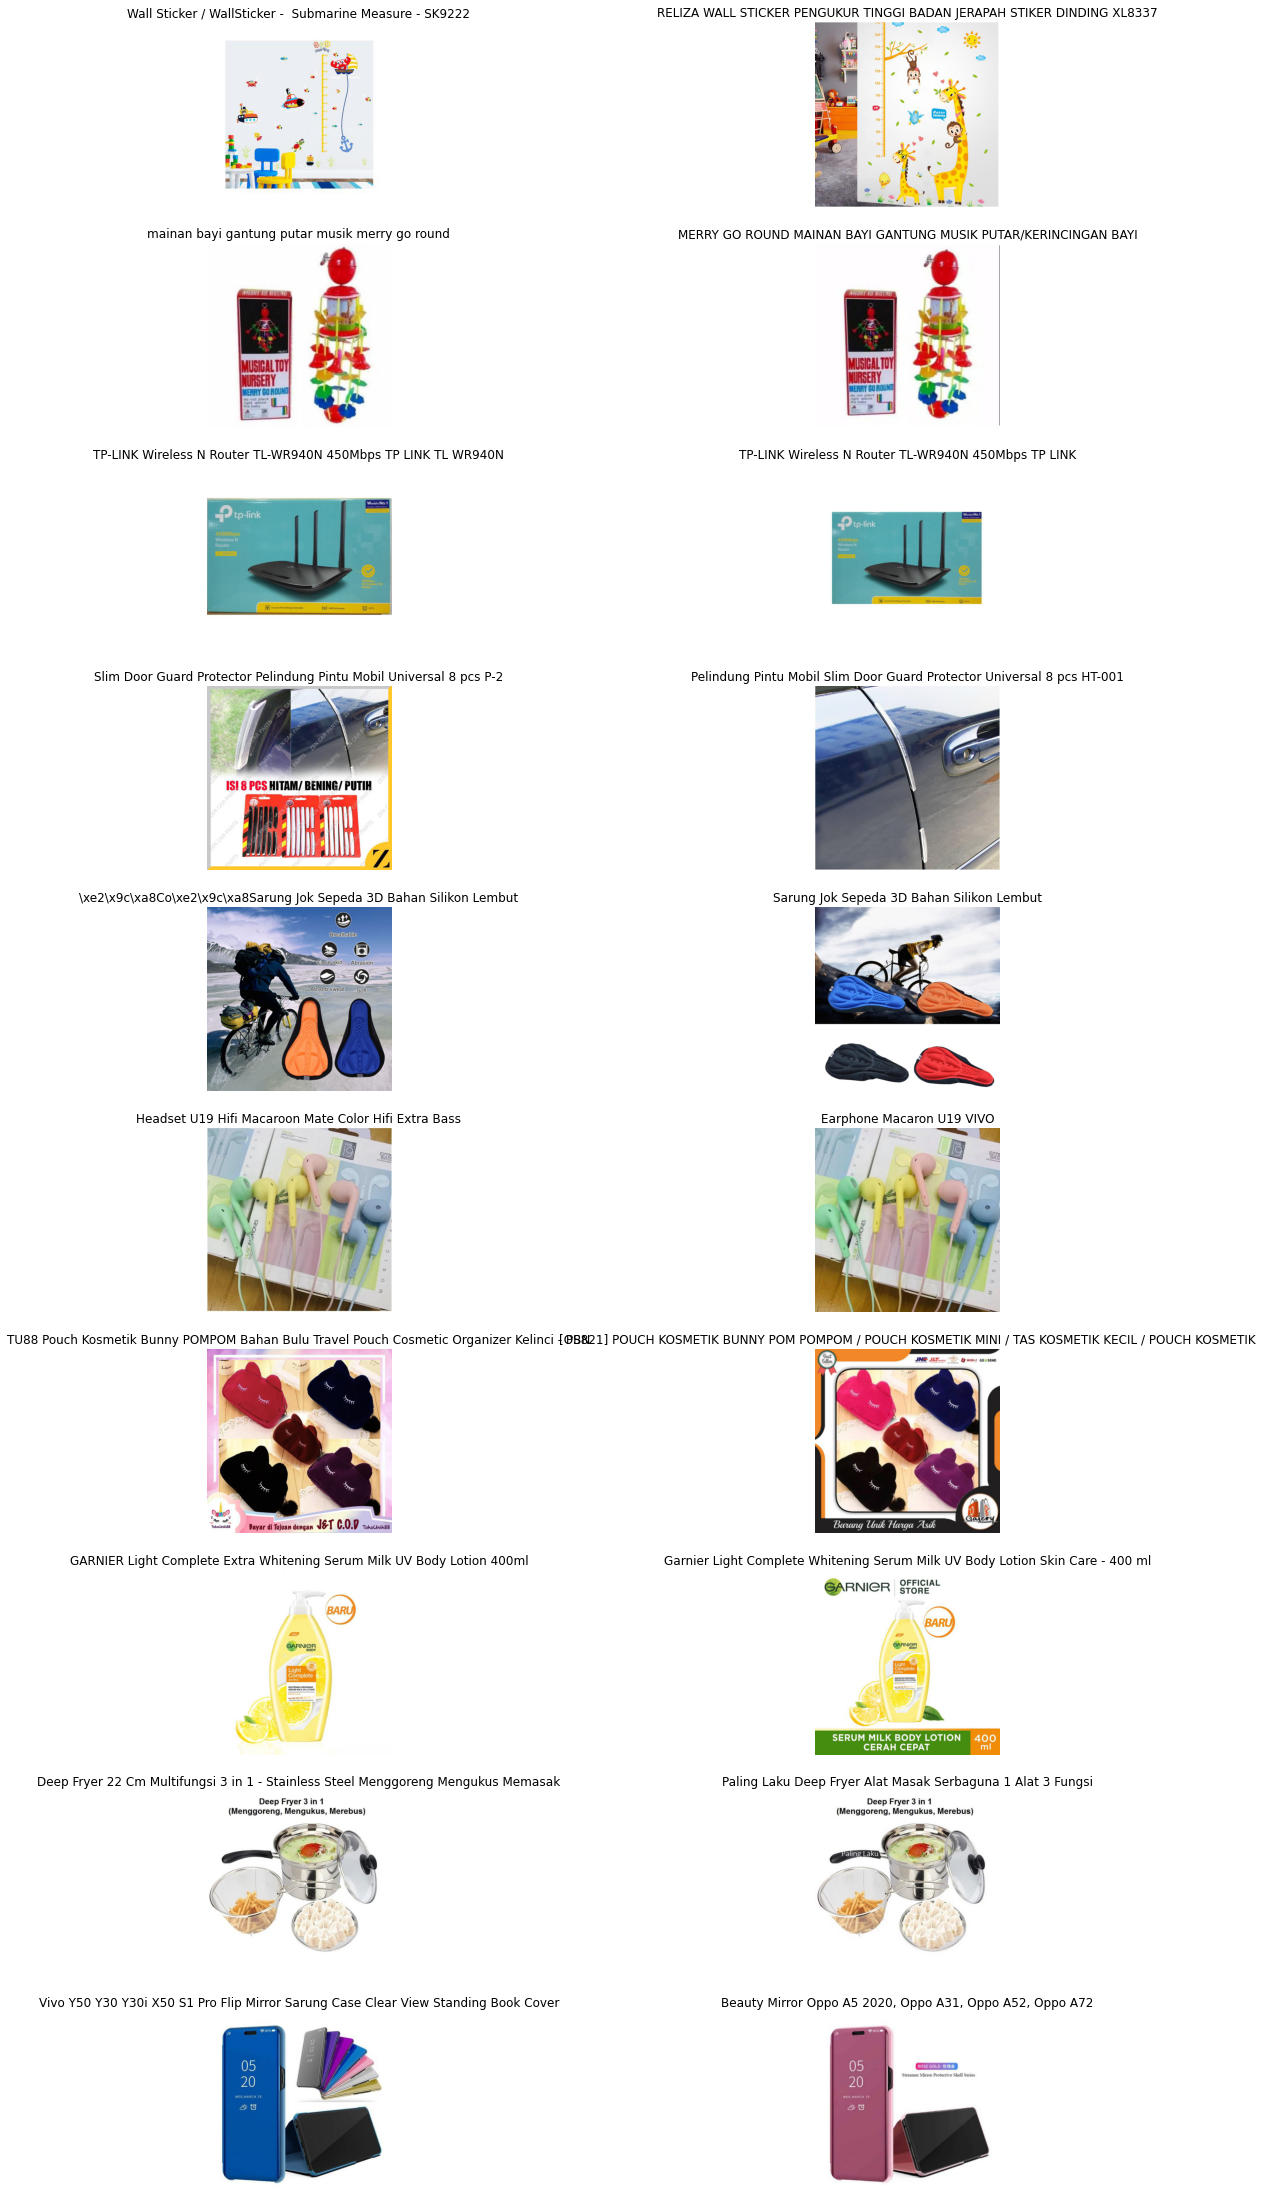

In [21]:
to_show = data[data.label_group.isin(labels.index.to_list())].sort_values('label_group')
show(to_show)

## BIG GROUP

In [29]:
label = grouped[grouped==51].index[0]
label

159351600

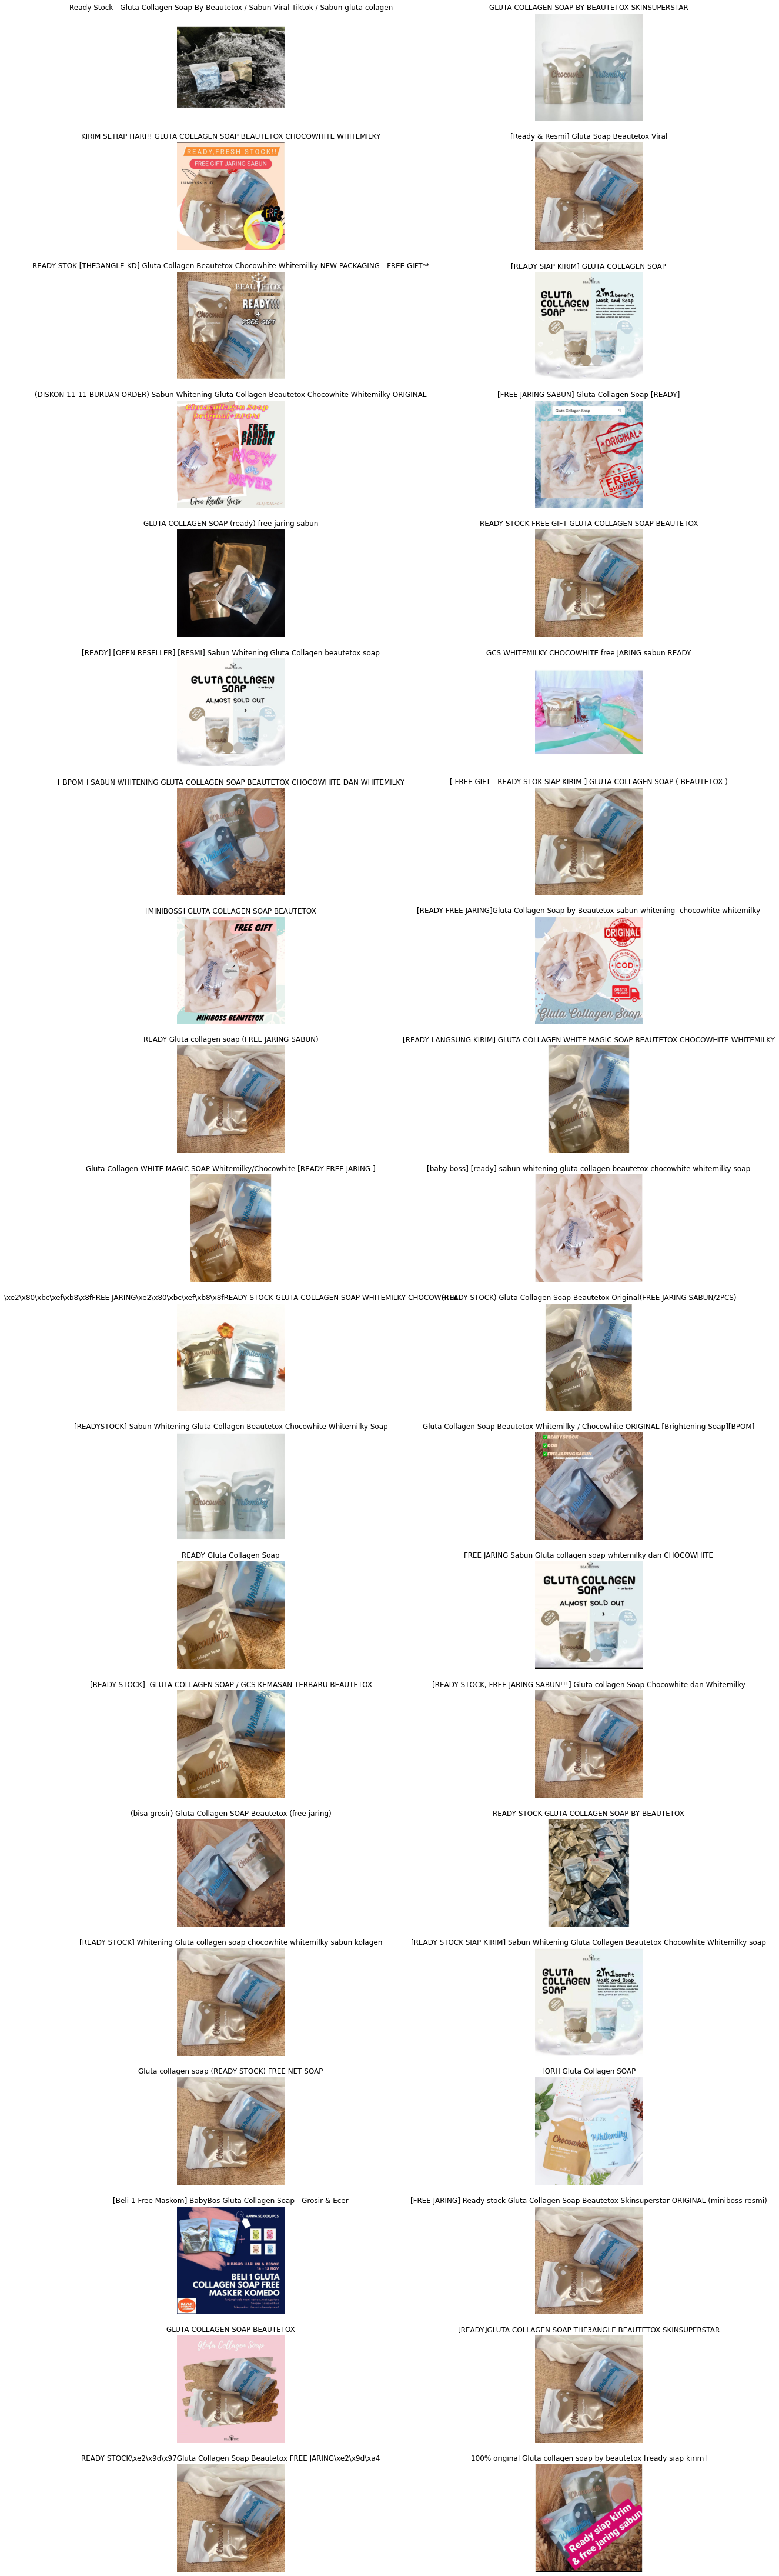

In [30]:
to_show = data[data.label_group ==label]
show(to_show)